# HW1: Data visualization (Due by Apr 14 11:59pm)

This homework addresses data visualization and data manipulation.

Before you submit this Jupyter Notebook (.ipynb file) to Gradescope, **please restart your kernel and run all.** You do not need to submit a pdf file or .py file.

In [609]:
# how to restart a kernal

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches

## Part 1: Combine multiple DataFrame objects to a large dataframe ( 5 pts )

Given the following temperature datasets, combine them to a large dataframe using `pandas.concat` command

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

In [610]:
# reading in datasets from a urls and creating 2 dataframes
url1 = f"https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv" # do f"link" -- but what is the {interval} -- already made an interval
df = pd.read_csv(url1)
url2 = f"https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv" # do f"link" -- but what is the {interval} -- already made an interval
df2 = pd.read_csv(url2)

# combining the datasets into one large dataframe
df = pd.concat([df, df2], ignore_index=True, axis=0)

## Part 2: Create dataframe (5 pts)

In this part, you should create a new dataframe based on the following two csv files and the dafaframe you create from part 1:


- FIPS code: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv


Create a new dataframe which includes the following columns: the ID number of the station, the year of the measurement, the temperature measurements (Jan - Dec in degrees C), country name, Lattitude, Longitude, station name (NAME column in station_metadata.csv).


**You will receive full credits if your dataframe contains all required columns. Column names and orders can be different.**

In [611]:
# reading in another 2 dataset from a url and creating seperate dataframes with them
url3 = f"https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv" # do f"link" -- but what is the {interval} -- already made an interval
df3 = pd.read_csv(url3)
url4 = f"https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv" # do f"link" -- but what is the {interval} -- already made an interval
df4 = pd.read_csv(url4)

# dropping a columns that we will not need to use
df3 = df3.drop(["ISO 3166"], axis=1) # axis = 1 is columns, so want to identify that we are dropping the columns named these 
df4 = df4.drop(["STNELEV"], axis=1)

# creating a common column and merging the two dataframes on that column
df4["FIPS 10-4"] = df4["ID"].str[0:2] # selecting first two letters in ID column
df3 = pd.merge(df4, df3, on=["FIPS 10-4"])

# dropping the common column "FIPS 10-4" because it is not needed
df3 = df3.drop(["FIPS 10-4"], axis=1)

# merging origional dataframe with the new dataframe
df = pd.merge(df, df3, on=["ID"])

# renaming columns for more readablity
df = df.rename(columns = {"Name"  : "Country"})

# converting the temperature values from 100ths of celcius to celsius
counter = 1
for i in range(12):
    month = "VALUE" + str(counter)
    df[month] = df[month] / 100
    counter += 1

df

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12,LATITUDE,LONGITUDE,NAME,Country
0,AG000060390,1901,10.34,8.44,11.64,15.34,15.64,23.54,24.44,23.64,22.14,16.04,13.64,10.04,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
1,AG000060390,1902,9.84,11.94,12.54,15.44,15.14,19.84,24.84,25.74,21.64,16.94,14.94,11.34,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
2,AG000060390,1903,11.44,10.64,12.66,13.46,16.46,19.06,23.26,24.46,21.46,19.26,13.56,10.56,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
3,AG000060390,1904,9.26,11.26,11.36,14.06,18.36,21.26,25.16,26.06,20.76,18.26,13.76,12.46,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
4,AG000060390,1905,9.06,8.66,13.86,15.76,15.96,21.46,23.26,24.96,22.06,17.16,13.86,10.76,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181310,ZI000067983,2012,21.86,NaN,21.57,18.33,18.35,16.25,15.63,NaN,20.34,NaN,22.98,21.99,-20.2000,32.616,CHIPINGE,Zimbabwe
181311,ZI000067983,2013,NaN,21.63,20.54,18.70,17.29,16.86,15.28,18.62,21.00,19.67,22.58,21.42,-20.2000,32.616,CHIPINGE,Zimbabwe
181312,ZI000067983,2014,NaN,21.87,NaN,NaN,NaN,NaN,NaN,NaN,20.87,21.10,22.97,NaN,-20.2000,32.616,CHIPINGE,Zimbabwe
181313,ZI000067983,2015,21.75,22.51,20.83,19.52,18.80,16.70,16.50,18.10,20.10,22.90,22.30,24.05,-20.2000,32.616,CHIPINGE,Zimbabwe


## Part 3: Write a query function (10 pts)

Write a function called `query_climate()` which accepts five arguments:

`df`, the file name for the dataframe

`country`, a string giving the name of a country for which data should be returned.

`year_begin` and `year_end`, two integers giving the earliest and latest years for which should be returned.

`month`, an integer giving the month of the year for which should be returned.

The return value of `query_climate()` is a Pandas dataframe of temperature readings for the specified country, in the specified date range, in the specified month of the year. This dataframe should have the following columns, **in this order**:

`NAME`: The station name.

`LATITUDE`: The latitude of the station.

`LONGITUDE`: The longitude of the station.

`Country`: The name of the country in which the station is located.

`Year`: The year in which the reading was taken.

`Month`: The month in which the reading was taken.

`Temp`: The temperature at the specified station during the specified year and month. 


**Grading is based on unseen test examples. A test example is given below.**

In [612]:
def query_climate(df, country, year_begin, year_end, month):
    """
    Args:
    The function takes in 5 arguments: df, country, year_begin, year_end, month
    1. df is the data frame we are filtering through
    2. country is the name of the country that we are focusing on
    3. year_begin is the year we want the data to start
    4. year_end is the year we want the data to end
    5. month is the month we want the data to come from

    Output:
    The function returns a dataframe of information according to the filter from the inputs. The dataframe has these columns in order: 
    NAME, LATITUDE, LONGITUDE, Country, Year, Month, Temp
    .....
    """
    # filtering the dataframe so that the only data it has it that of the country that was specified
    country = df[df["Country"] == country]

    # filtering the dataframe so that the only data it has is from between the years that was specified
    years = country[(country["Year"] > year_begin-1) & (country["Year"] < year_end+1)]
    
    # stacking temperatures into a column, and creating a column for what month the temperature corresponds to (in integers 1-12)
    years = years.set_index(keys=["ID", "Year", "LATITUDE", "LONGITUDE", "Country", "NAME"])
    months = years.stack()
    months = months.reset_index()
    months = months.rename(columns = {"level_6"  : "Month" , 0 : "Temp"})
    months["Month"] = months["Month"].str[5:].astype(int)

    # filtering the dataframe so that the only data it has is from the specified month
    months = months[months["Month"] == month]

    #dropping the "ID" column
    months = months.drop(["ID"], axis = 1)

    # organizing columns into order specified in instructions
    months = months[['NAME', 'LATITUDE', 'LONGITUDE', 'Country', 'Year', 'Month', 'Temp']]

    # returns filtered dataframe
    return months

# # example: 
# query_climate(df = df, country = "India", year_begin = 1901, year_end = 2012, month = 1)


Run this example and check if you get the correct result, your obtained dataframe looks like:

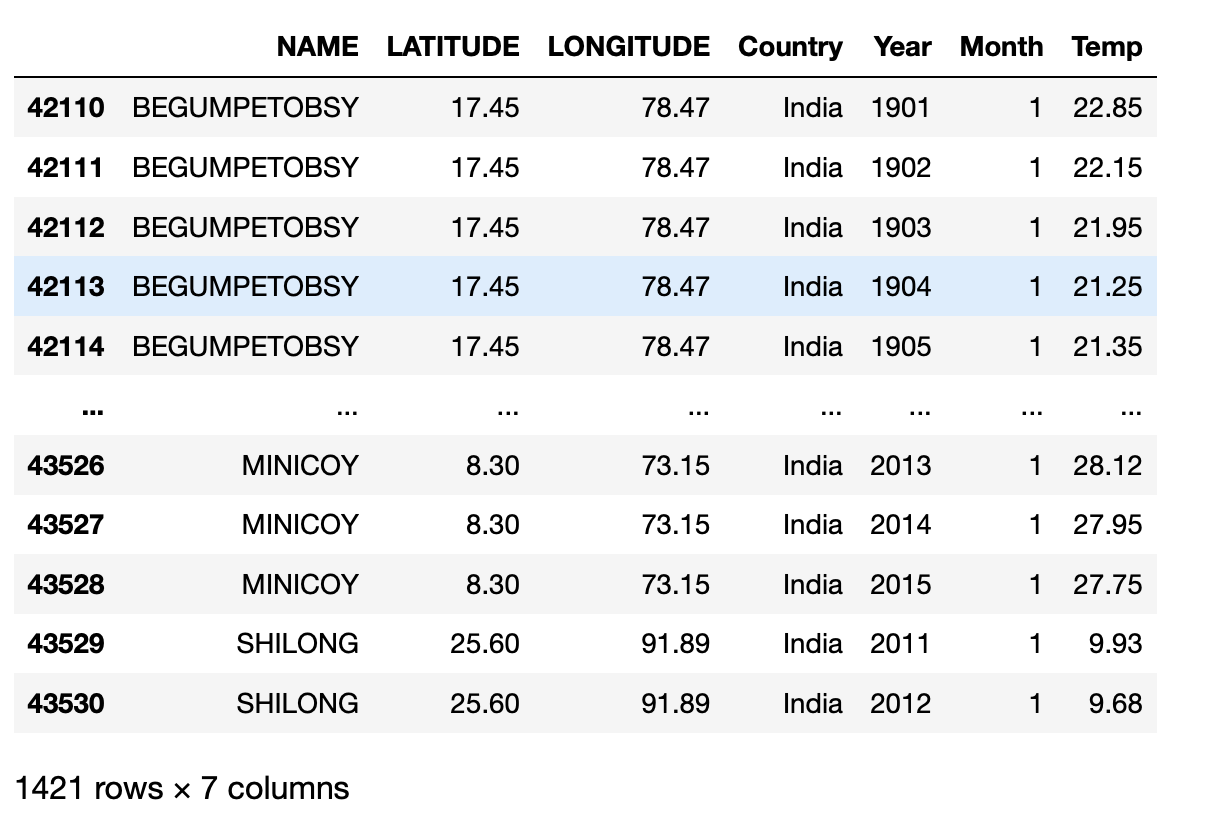

## Part 4: Global warming ( 10 pts )

In this part, the goal is to create a bar plot which is used to compare average temperatures of decadeds 1901-1910 and 2011-2020.

The bar plot looks like the following:

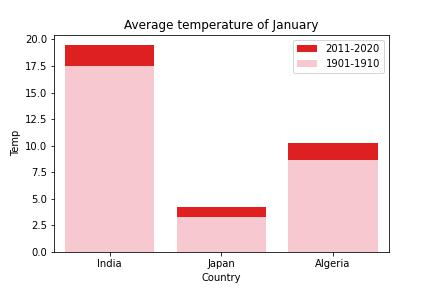

In above plot, I select three different countries and compute the average temperatures of year range 1901-1910 and 2011-2020 in January. Then, I use (two) barplot(s) to visualize the average temperature. 

**You should do more than my sample plot:**

Select 4 different countries and 6 different months, then compute two average temperatures for each country in each certain month. Then visualize 6 different plots (included in a single plot using `subplot` command). Please add necessary labels, titles, and legends to make your plot clear.

You should write a function or class to simplify your code if necessary.

What is your conclusion?

/var/folders/s3/4mwfywvj5ss6j0jj7sbftl180000gn/T/ipykernel_75361/2704769970.py:93: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data1 = pd.concat([data1, innerdata], ignore_index=True, axis=0)
/var/folders/s3/4mwfywvj5ss6j0jj7sbftl180000gn/T/ipykernel_75361/2704769970.py:94: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data2 = pd.concat([data2, innerdata2], ignore_index=True, axis=0)


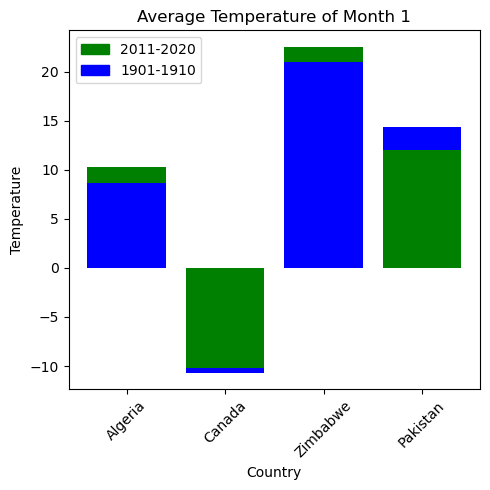

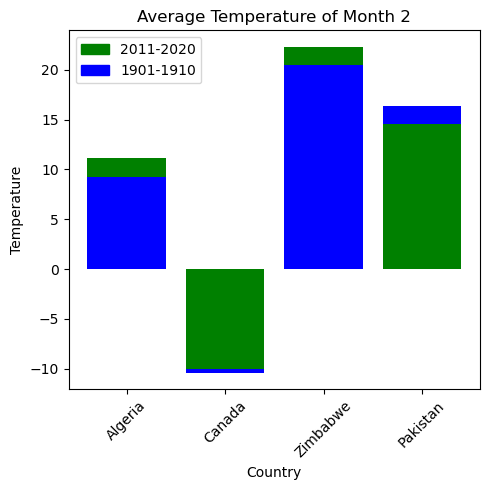

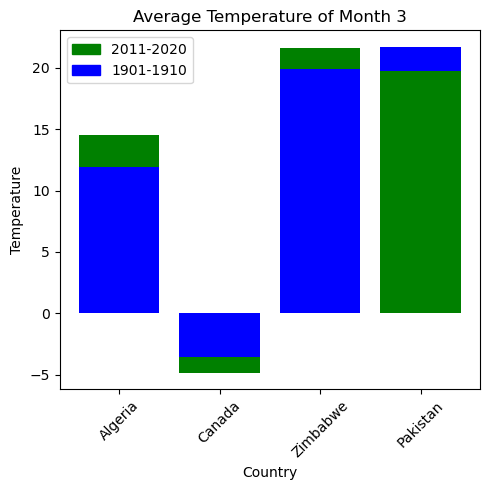

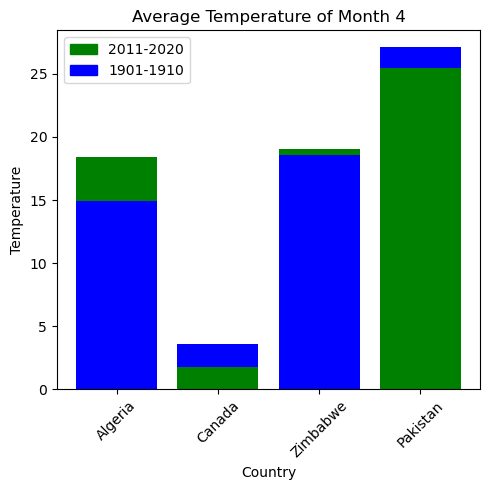

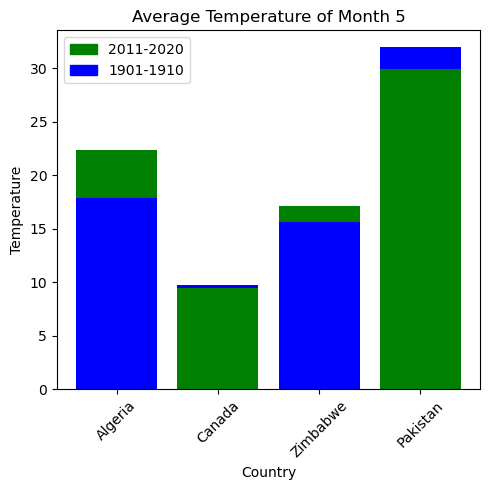

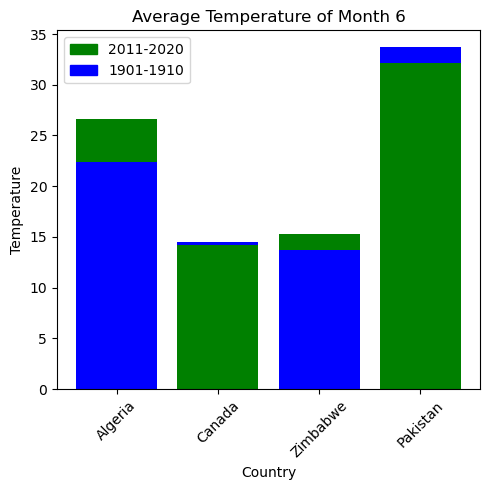

In [613]:
# function to transform the dataframes into a more usable form
def transform(df):
    """
    Args:
    The function takes in 1 argument - the data frame that needs to be transformed

    Output:
    The function returns the altered dataframe. The dataframe now has the temperatures stacked into a column, and now has a column for what month the temperature corresponds to
    (in integers 1-12). In addition, the dataframe now does not include the "ID", "LATITUDE", "LONGITUDE", or "NAME" columns.
    .....
    """
    # stacking temperatures into a column, and creating a column for what month the temperature corresponds to (in integers 1-12)
    df = df.set_index(keys=["ID", "Year", "LATITUDE", "LONGITUDE", "NAME", "Country"])
    df = df.stack()
    df = df.reset_index()
    df = df.rename(columns = {"level_6"  : "Month" , 0 : "Temp"})
    df["Month"] = df["Month"].str[5:].astype(int)
    # dropping the "ID", "LATITUDE", "LONGITUDE", and "NAME" columns
    df = df.drop(["ID", "LATITUDE", "LONGITUDE", "NAME"], axis = 1)

    # returning the new, reformed, dataframe
    return df

# function to find the average temperature in a certain country for a certain month
def average_temp_per_month(df, country, month):
    """
    Args:
    The function takes in 3 arguments: df, country, and month
    1. df is that dataframe we are pulling data from
    2. country is the country we are averaging the temperature for
    3. month is the month we are averaging temperature for

    Output:
    The function returns an adjusted dataframe called "current" that now holds 3 columns and only 1 row of data- the country, the month, and the mean temperature for 
    that country in that month
    .....
    """
    #setting a local variable current, to the specified dataframe
    current = df

    # filtering the dataframe so that the only data it has it that of the country that was specified
    current = current[current["Country"] == country]
    
    # filtering the dataframe so that the only data it has it that of the month that was specified
    current = current[current["Month"] == month]

    # setting the values in the "Temp" column to the mean of all of the values in the current "Temp" column
    current["Temp"] = current["Temp"].mean()

    # deleting all rows but the first
    current = current["Temp"].iloc[0]

    # returning the dataframe
    return current

# Dividing data into two dataframes based on what year the data is from
firstyear = df[(df["Year"] > 2010) & (df["Year"] < 2021)]
secondyear = df[(df["Year"] > 1900) & (df["Year"] < 1911)]

# setting the dataframes into their new form using the function
firstyear = transform(firstyear)
secondyear = transform(secondyear)

# creating empty dataframes for the first year set and the second year set to hold Country, Month, and Temp data for each country
data1 = pd.DataFrame(columns = ["Country","Month", "Temp"])
data2 = pd.DataFrame(columns = ["Country","Month", "Temp"])

# Specifying countries that will be used
Countries = ["Algeria", "Canada", "Zimbabwe", "Pakistan"]
# Countries = ["India", "Japan", "Algeria"]
# Countries = ["Japan", "France", "Egypt", "Chile"]

# for loop to add data to the data1 and data2 dataframes
for each in Countries:
    for i in range(1,13):
        # creating temporary DataFrames
        innerdata = pd.DataFrame(columns = ["Country","Month", "Temp"])
        innerdata2 = pd.DataFrame(columns = ["Country","Month", "Temp"])

        # setting the "Country" column to the country being used in this iteration of the outer for loop 
        # and the month being used in this iteration of the inner for loop
        innerdata["Country"] = [each]
        innerdata["Month"] = [i]
        innerdata2["Country"] = [each]
        innerdata2["Month"] = [i]
        
        # using a function to set the "Temp" column to what the average temperature is for the country being used in this iteration of the outer for loop 
        # and the month being used in this iteration of the inner for loop
        innerdata["Temp"] = [average_temp_per_month(firstyear, country = each, month = i)]
        innerdata2["Temp"] = [average_temp_per_month(secondyear, country = each, month = i)]

        # updating data1 and data2 so that this country and month will be saved in the dataframe
        data1 = pd.concat([data1, innerdata], ignore_index=True, axis=0)
        data2 = pd.concat([data2, innerdata2], ignore_index=True, axis=0)

# for loop to plot the 6 graphs
for month in range(1, 7):
    
    # filtering the dataframes so that the only data it has it that of the month corresponding to the month being used in this iteration of the for loop
    month_data1 = data1[data1["Month"] == month]
    
    month_data2 = data2[data2["Month"] == month]
    # Create figure and axes
    fig.subplots_adjust(hspace=5, wspace=5)
    plt.rcParams["figure.figsize"] = [5, 5]
    
    fig, ax = plt.subplots()

    #cycling through Countries in earlier list
    for country in Countries:

        # filtering the data's for just the country the for loop is referencing in this iteration
        country_data1 = month_data1[month_data1["Country"] == country]
        country_data2 = month_data2[month_data2["Country"] == country]

        # setting temp_value's for data1 and data2 for the average temperature in the country the inner for loop is referencing in the month that the outer for loop is referencing
        temp_value1 = country_data1["Temp"].iloc[0]
        temp_value2 = country_data2["Temp"].iloc[0]

        # if both of the temp_values are negatives, the smaller value will cover the larger value if printed second, so enter this if
        if (temp_value1<0) & (temp_value2<0):
            # if the data 1 temperature is larger, plot data2 first, then data1 on top of it (for visibility)
            if (temp_value1) > (temp_value2):
                ax.bar(country_data2["Country"], country_data2["Temp"], color="blue", alpha=1)
                ax.bar(country_data1["Country"], country_data1["Temp"], color="green", alpha=1)
            
            # if the data 2 temperature is larger, plot data1 first, then data2 on top of it (for visibility)
            if (temp_value2) > (temp_value1):
                ax.bar(country_data1["Country"], country_data1["Temp"], color="green", alpha=1)
                ax.bar(country_data2["Country"], country_data2["Temp"], color="blue", alpha=1)

        # otherwise, the larger value will cover the smaller value if printed second, so enter this if
        else:
            # if the data 1 temperature is larger, plot data1 first, then data2 on top of it (for visibility)
            if (temp_value1) > (temp_value2):
                ax.bar(country_data1["Country"], country_data1["Temp"], color="green", alpha=1)
                ax.bar(country_data2["Country"], country_data2["Temp"], color="blue", alpha=1)

            # if the data 2 temperature is larger, plot data2 first, then data1 on top of it (for visibility)
            if (temp_value2) > (temp_value1):
                ax.bar(country_data2["Country"], country_data2["Temp"], color="blue", alpha=1)
                ax.bar(country_data1["Country"], country_data1["Temp"], color="green", alpha=1)

        # Add labels and title
        ax.set_xlabel("Country")
        ax.set_ylabel("Temperature")
        ax.set_title(f"Average Temperature of Month {month}")
        
        # Rotate country labels for better readability
        plt.xticks(rotation=45)
    # Make legend
    green_patch = mpatches.Patch(color='green', label="2011-2020")
    blue_patch = mpatches.Patch(color='blue', label="1901-1910")
    plt.legend(handles=[green_patch, blue_patch])
    plt.show()



In this series of graphs, I decided to analyze the average temperatures of Algeria, Canada, Zimbabwe, and Pakistan in the first 6 months of the year. This series of graphs plots two sets of data, esentially, the data for each month for the country between the years of 1901 and 1910, and the same data but for between the years of 2011 and 2020. The graphs represent well the temperatures of the places of the world - with Canada's graph beggin in the negative for its harsh winter, and Pakistan's remaining pretty significantly warmer than the others in the later months to represent its warmer weather patterns. The division between date groups also helps illustrate the changes in weather patterns in the individual countries over time. In the first two months, Algeria, Canada, and Zimbabwe show that the winters were significantly warmer in more recent years - helping viewers hypothesize of global warming effects. And as for Pakistan, the more recent years have been cooler - again showing climate change, as places that are normally in extreme heat have even been shown to be cooling down. In all the spread of data these graphs represent, can help scientists analize the planet, and provide evidence for scientific theories.

## Part 5: Plots (15 pts)

In this part, please create at least **three** complex and interesting interactive data visualizations using the dataframe created above. These plots must be of different types (e.g. scatter plot, line plot, histogram, bar plot, and etc) and are different from what you have created in Part 4. You are also welcome to create any plots which are not discussed in the lectures.

Alongside the plots, you should clearly describe (use markdown) what you do for each plot and state your conclusions.

Requirement: You should use seaborn.

**Grading is based on the plots and your description. Your explanation should match your plot.**

In [618]:
final_data = pd.concat([data1, data2], ignore_index=True, axis=1)
final_data = final_data.rename(columns = {0  : "Country" , 1 : "Month", 2 : "Data1 Temp", 5 : "Data2 Temp"})
final_data = final_data.drop([3, 4], axis=1)
# final_data.head()

new_data = pd.DataFrame(columns = ["Country", "Month", "Temp", "Years"])
new_data = pd.concat([
    new_data, 
    pd.DataFrame({"Temp": final_data["Data1 Temp"], "Years": "2011-2020", "Country": final_data["Country"], "Month": final_data["Month"]}),
    pd.DataFrame({"Temp": final_data["Data2 Temp"], "Years": "1901-1910", "Country": final_data["Country"], "Month": final_data["Month"]})
], ignore_index=True)

# Display the DataFrame
# new_data.head(60)

/var/folders/s3/4mwfywvj5ss6j0jj7sbftl180000gn/T/ipykernel_75361/1174490333.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_data = pd.concat([


/Users/fionnualaeastwood/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/fionnualaeastwood/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/fionnualaeastwood/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/fionnualaeastwood/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

<Axes: xlabel='Temp', ylabel='Count'>

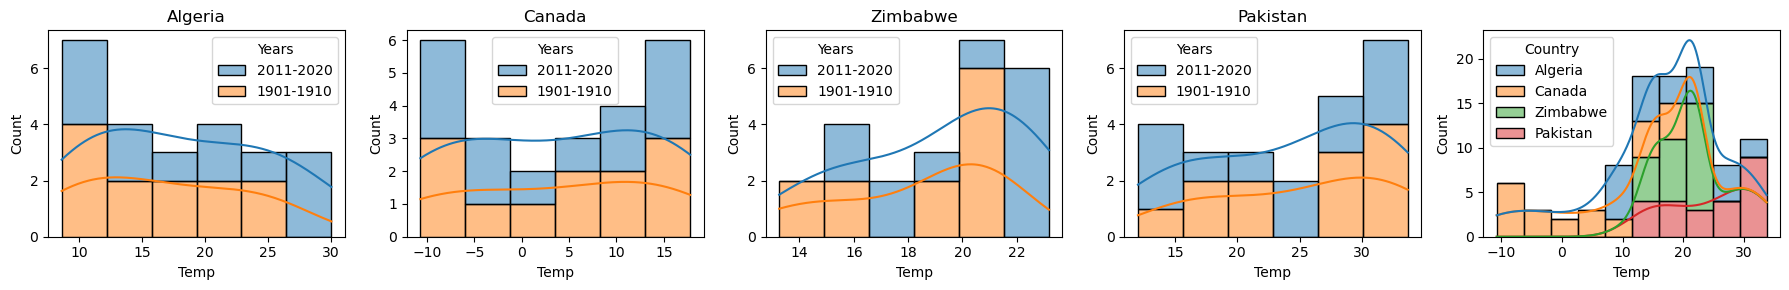

In [620]:
#1 Histogram Plot
fig.subplots_adjust(hspace=6, wspace=10)
plt.rcParams["figure.figsize"] = [18, 3]
fig, ax = plt.subplots(1,5)
counter = 0
for country in Countries:
    histplot_data = new_data[new_data["Country"] == country]
    sns.histplot(data=histplot_data, x="Temp", kde = True, element="bars", hue="Years", multiple="stack", ax=ax[counter]).set(title=country)
    counter +=1

sns.histplot(data=new_data, x="Temp", kde = True, element="bars", hue="Country", multiple="stack")

In this grouping of histograpm plots, I decided to represent the frequencies of temperature grades in each geographical region, and provide comparative information for recent years versus past years. In addition, I provided a graph to visualize all of the data together, so that viewers can see a greater trend in world heating patterns. In this last graph, we can see that in general, the greatest frequency is the middle, or more temperate heat range, which makes sense as all of these differing regions converge towards a more neutral meeting point. As Pakistan and Zimbabwe have general higher frequency in the hotter ranges, we can infer a desert or savannah terrain, whereas Canada and Algeria show more of a diversity in spread, with high frequencies in the colder temperatures, indicating harsher winters. The representation of Years in the graph, also shows us where there may be higher frequencies in more recent years. For example, Zimbabwe shows a HUGE frequency of high temperatures, where there were none in the 1900's. Plus, Algeria and Canada show that there is a much higher addition of frequencies in the extreme temperatures, with less frequency added in the middle. Again, all of these frequency changes could be used as evidence towards hightened impact of climate change.

/Users/fionnualaeastwood/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/fionnualaeastwood/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/fionnualaeastwood/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/fionnualaeastwood/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

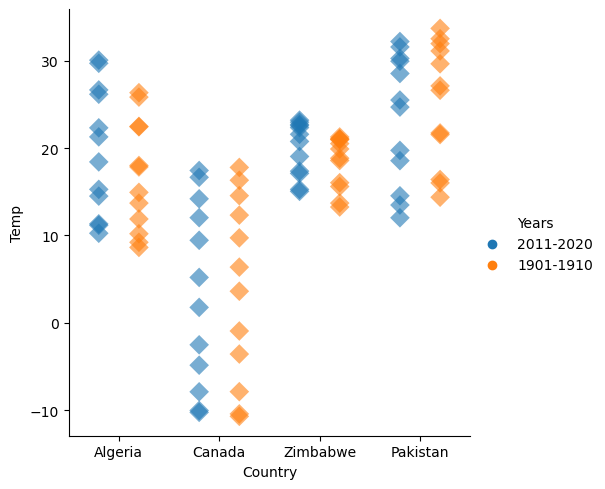

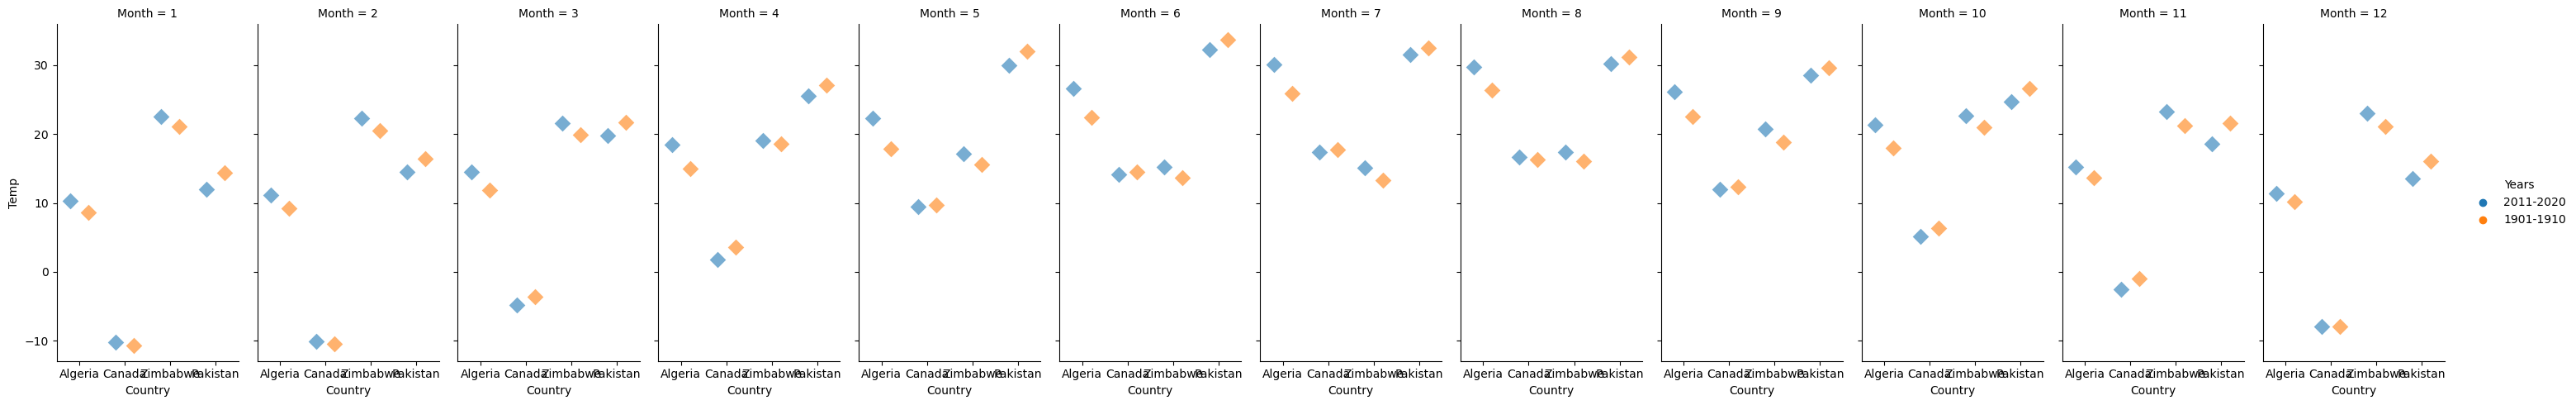

In [621]:
#2 Jitterplot using Catplot

sns.catplot(data=new_data, x="Country", y="Temp", kind='strip', hue="Years", dodge=True, jitter=False, s=100, marker="D", linewidth=0, alpha=.6)
sns.catplot(data=new_data, x="Country", y="Temp", hue="Years", col="Month", aspect=.5, dodge=True, jitter=False, s=100, marker="D", linewidth=0, alpha=.6)

In this spread of plots, I use the jitter catplot to represent a large generalized plot, expressing average temperatures in each region (again split by year-grouping). This really helps the viewer visualize the different climates, and especially how much they have changed - as we can see clearly here that Pakistan has the highest temperatures of the group, and that Canada has the lowest average temperatures. This graph shows that it is probably either Algeria or Zimbabwe that show the most drastic change in temperature over the years - as the percentage of data visualized from recent years is higher that the data from the 1900's.
The smaller plots on the bottom give a really good representation of these countries data's split throughout the year. Not only are we able to see how much temperatures have changed throughout the years on a monthly basis, but we can also see how it is a general trend that the temperatures for all countries are lower in the earlier months, reach highs in the middle to late months, and reach lows again in the very late months. It is valuable to have that visualization that the data is accurate, because we can see that undebatable, natural procession of seasons in the data!

In [631]:
df

,Year,Country,Month,Temp,Date
0,1901,Algeria,1,10.34,1901-01-01
1,1901,Algeria,2,8.44,1901-02-01
2,1901,Algeria,3,11.64,1901-03-01
3,1901,Algeria,4,15.34,1901-04-01
4,1901,Algeria,5,15.64,1901-05-01
...,...,...,...,...,...
1899682,2016,Zimbabwe,5,16.92,2016-05-01
1899683,2016,Zimbabwe,6,16.81,2016-06-01
1899684,2016,Zimbabwe,8,18.28,2016-08-01
1899685,2016,Zimbabwe,10,23.34,2016-10-01


/Users/fionnualaeastwood/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/fionnualaeastwood/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


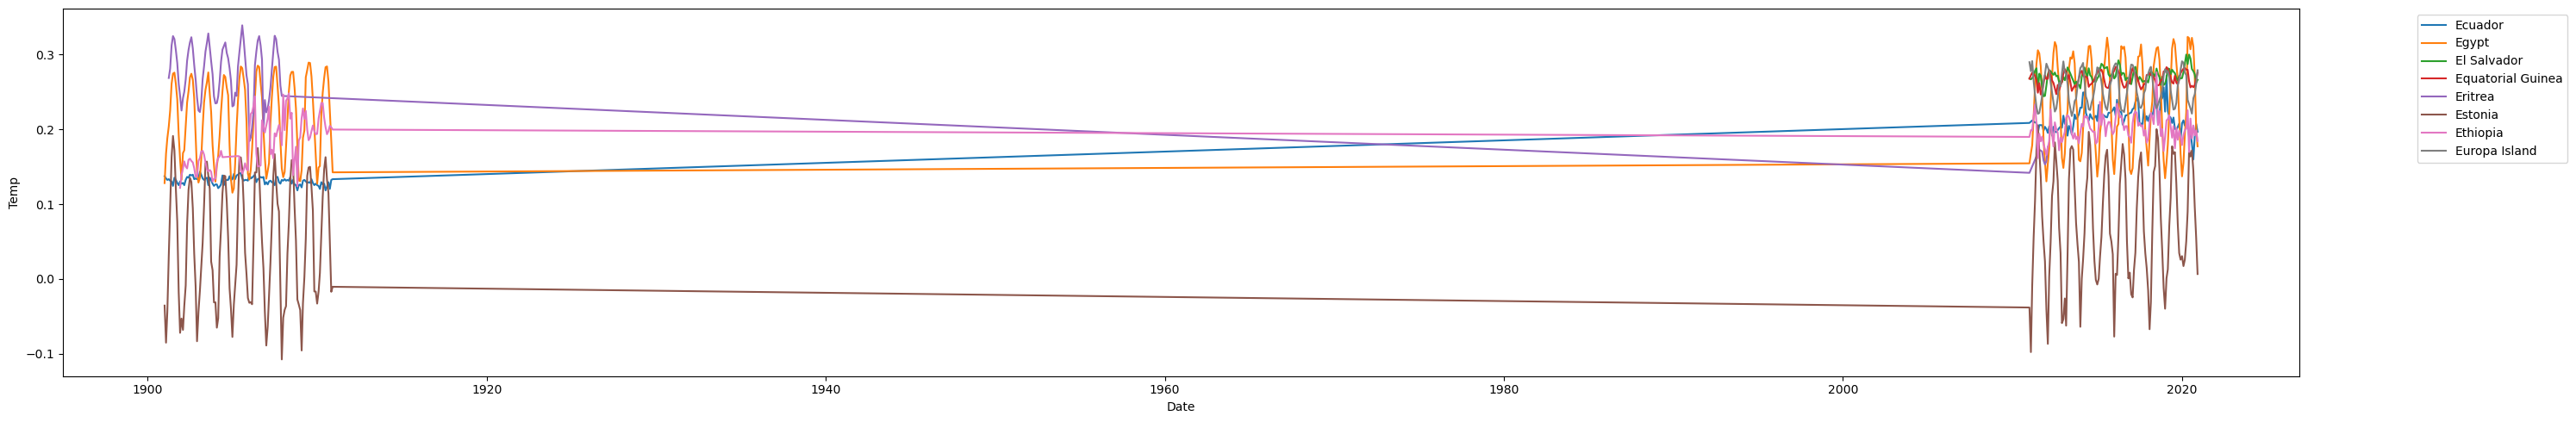

In [644]:
#3
fig.subplots_adjust(hspace=5, wspace=5)
plt.rcParams["figure.figsize"] = [30, 5]
fig, ax = plt.subplots(1,1)

df["Date"] = df["Year"].astype(str) + "-" + df["Month"].astype(str)
# no column Date yet, so by doing this ^ creates new column
df

df["Date"] = pd.to_datetime(df["Date"]) # now its a date, and not a string
df

averages = df.groupby(["Country", "Date"]) [["Temp"]].mean()/100
averages

averages = averages.reset_index()
averages

begins_with = averages[averages["Country"].str[0] == "E"]

sns.lineplot(data = begins_with, 
             x = "Date", 
             y = "Temp", 
             hue = "Country")

# legend needs to be adjusted
plt.legend(bbox_to_anchor=(1.05, 1),loc=2)
#plt.savefig("pd-1-example-plot.png", bbox_inches = "tight")

In this lineplot, I drew inspriation from lecture 3, where we are able to represent a wide variety of countries throughout the years, and show a complicated assortment of data in one graph. Here, as we only have data from very specific time periods, its also interesting to see the lines going between, as the slope says a lot about the trajectory of the temperature throughout the years. For example, we can see how Estonia's line goes down throughout the end of the 1900's, whereas Ecuadors has a higher trend. It also is able to show during the seperated time frames, the trends of temperature staying relatively steady - so its really throughout the years that we see major changes.

## Publish (5 pts)

Publish your work on github: Create a repository called HW in your github account, then upload your jupyter notebook. You should create a readme.md file to describe this repository. Please include the link in this cell

make a repository that is public under naem HW and submit link

In [ ]:
https://github.com/fioneastwood/HW